In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time
import itertools
from tqdm import tqdm
from progress.bar import IncrementalBar
from IPython.display import clear_output, display

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# warnings are not important :)
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import graph module
import sys
sys.path.append("../../")
from tools.graph_tools import *
from oracles.minimization import *
from methods.gradient_tracking import *

In [5]:
####

In [6]:
N_nodes     = 50
N_variables = 5 
x = np.array([1.0, 2.0, 1.0, 2.0, 1.0])
x0 = np.full((N_nodes, N_variables), [1, 2, 3, 4, 5])
xx = np.full((N_nodes, N_variables), [1.0, 2.0, 1.0, 2.0, 1.0])

regcoef = 0.01
oracles = []
l_list = []
for i in range(N_nodes):
    A = np.random.random((N_variables, N_variables))
    b = A.dot(x)
    oracle = LinearRegressionL2Oracle(A, b, regcoef = regcoef)
    oracles.append(oracle)
    l_list.append(np.linalg.svd(A)[1].max()**2 / oracle.den)
    
W = make_random_graph_matrix(N_nodes, 0.2)
W = fill_metropolis_weigts(W)

def compute_params_for_gradient_tracking(mu: float, l: float, lam: float):
    alpha = (1 - lam)**3 / (4244 * l)
    theta = np.sqrt(mu * alpha) / 2
    return {"alpha": alpha, "theta": theta}

mu = regcoef
lam = sorted(np.linalg.svd(W)[1], reverse=True)[1]
params = compute_params_for_gradient_tracking(mu=mu, l=max(l_list) + regcoef, lam=lam)
alpha = params["alpha"]
theta = params["theta"]
print("params: ", params)

err = pow(10, -3)
max_iter = pow(10, 4)

def calc_delta_Fx(oracles, x):
    res = []
    for i in range(len(oracles)):
        res.append( oracles[i].grad(np.array([x[i,j] for j in range(N_variables)])) )
    return np.matrix(res)

def calc_F(oracles, x):
    res = []
    for i in range(len(oracles)):
        res.append( oracles[i].func(np.array([x[i,j] for j in range(N_variables)])) )
    return np.matrix(res)

params:  {'alpha': 3.055487696299019e-05, 'theta': 0.00027638233012889133}


In [7]:
gt = Gradient_track(F = oracles,
                 f = oracles,
                 calc_delta_Fx = calc_delta_Fx,
                 calc_F = calc_F,
                 W = W,
                 x0 = x0,
                 xx = xx,
                 alpha = alpha,
                 theta = theta,
                 mu = mu,
                 err = err,
                 max_iter = max_iter,
                 need_log = False,
                 need_err_logs = True)

74.16857280968371 [|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||] 0.001
err:	 0.0009443305818897777
k:	 6409
x[0]:	 [[0.93172875 1.92824033 1.10873086 2.03218511 0.93201499]]

End:  0.0009443305818897777


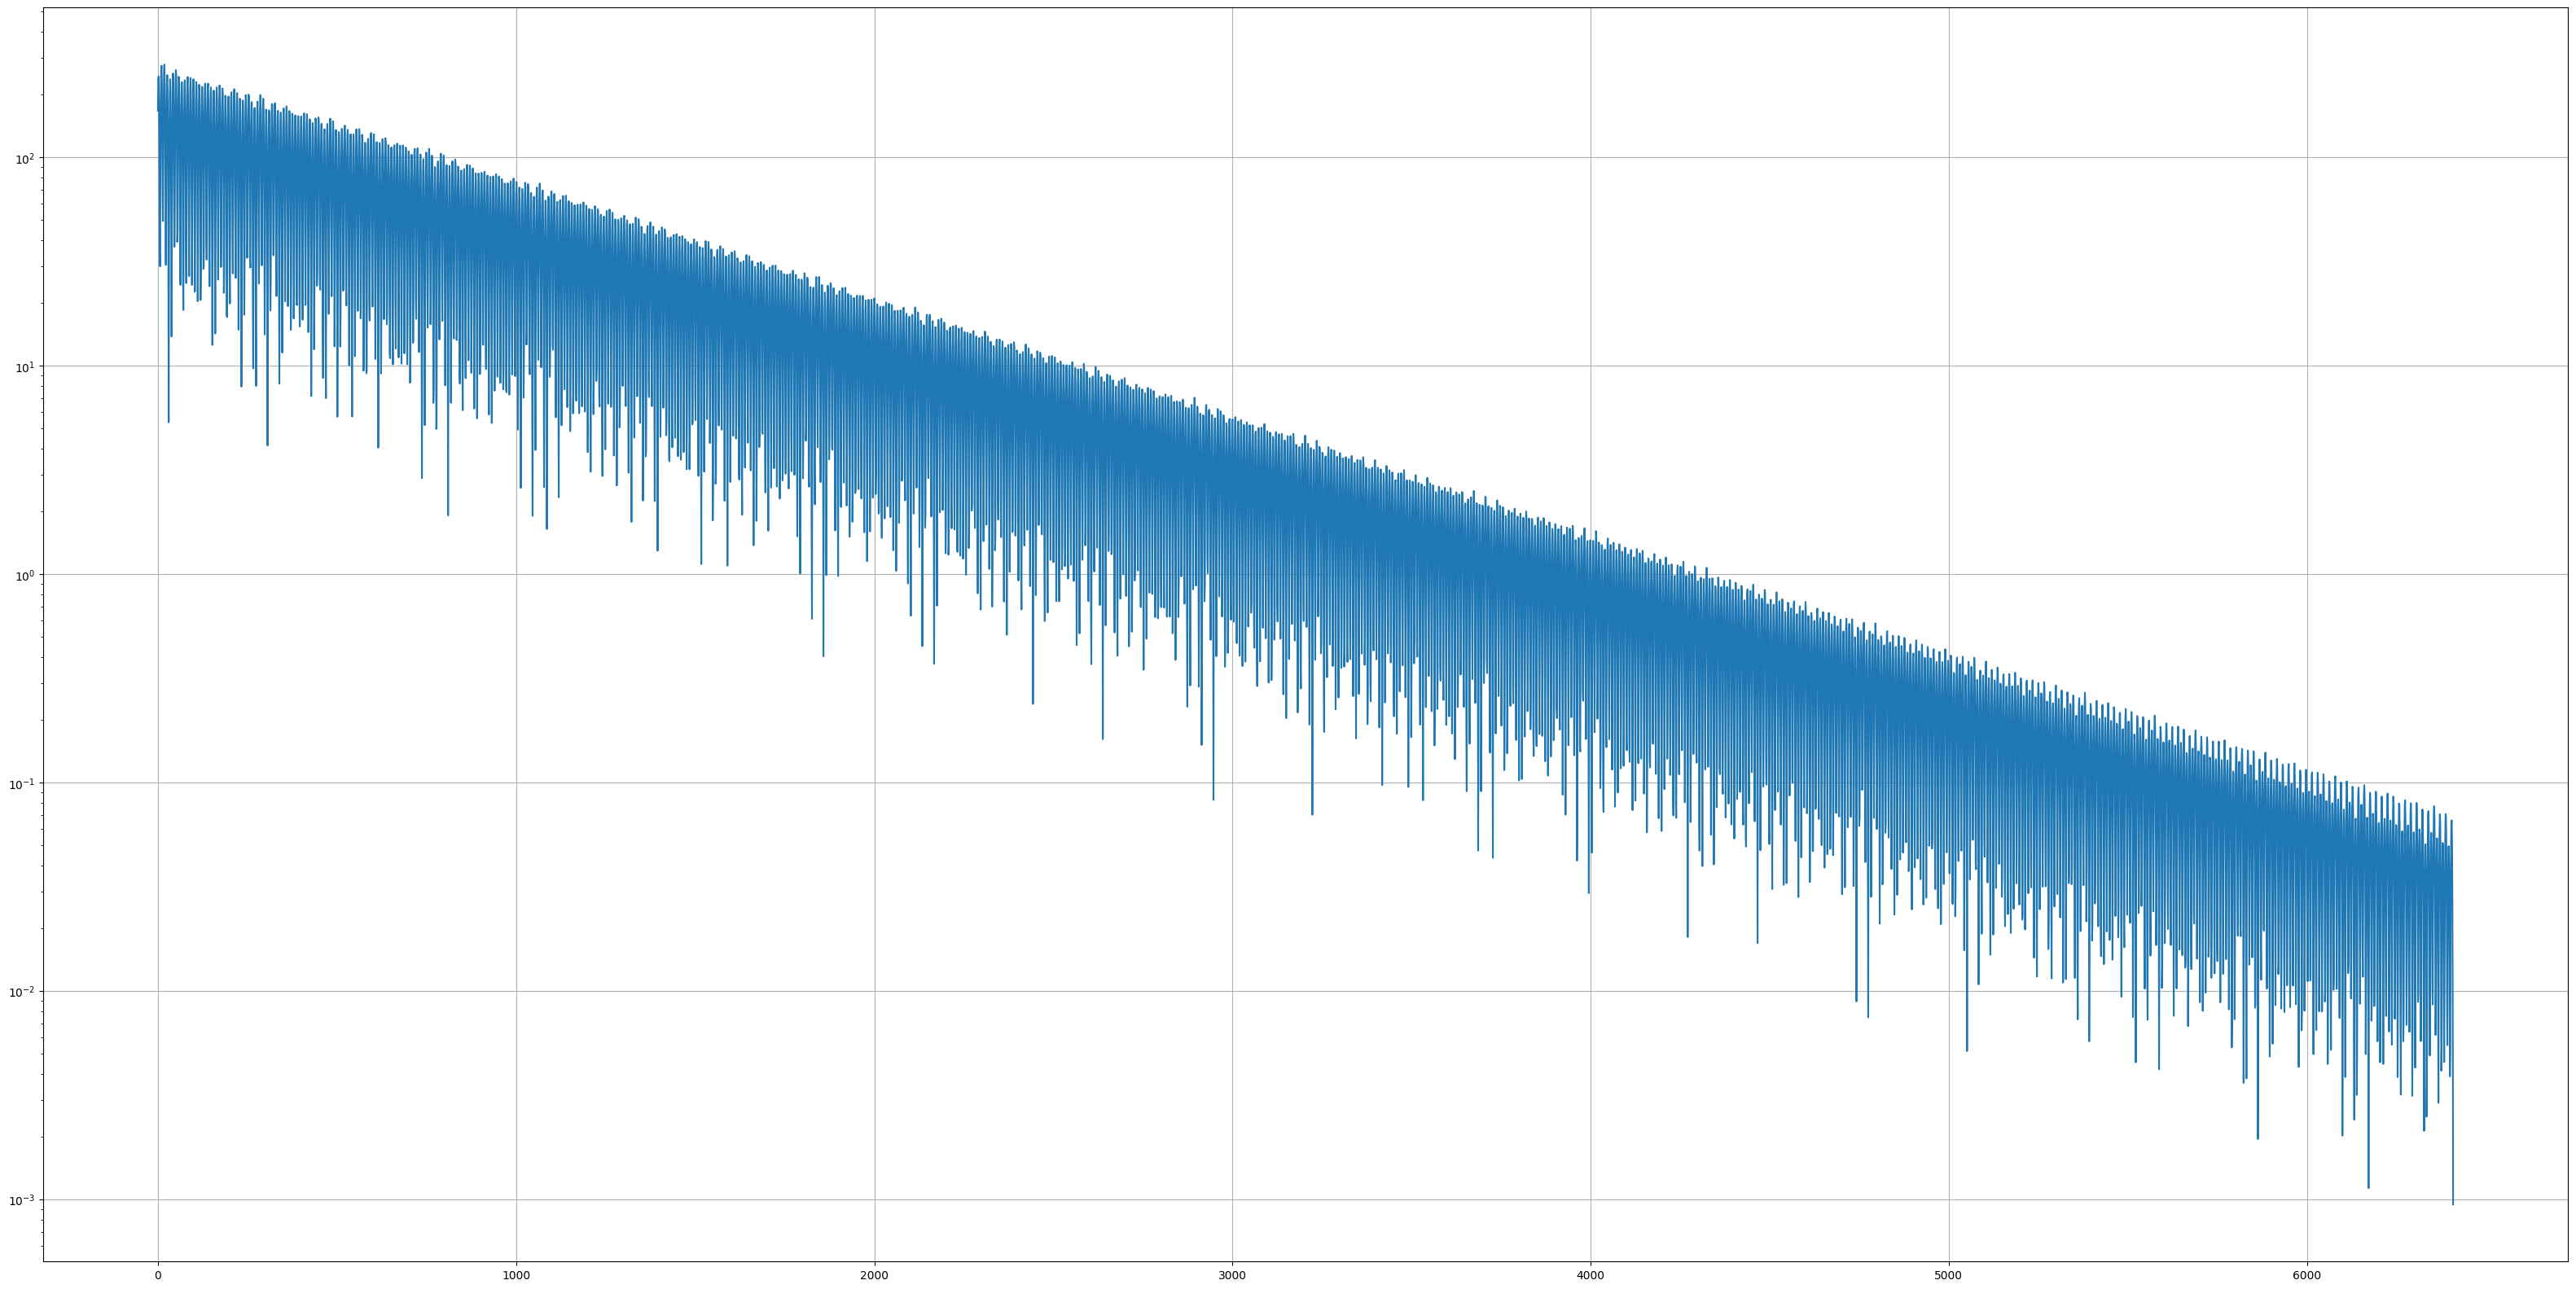

In [8]:
gt.pre_work()
gt.run_with_status_bar(is_dymamic = True,
                       need_err_list = False,
                       need_plot = True)